**Question 2: Start with the explicit Euler scheme and code this into the starting Matlab file. Use r = 1 and a = 0.5 as infection and recovery rate constants.**

Theoretical maximum infected fraction: 0.1535


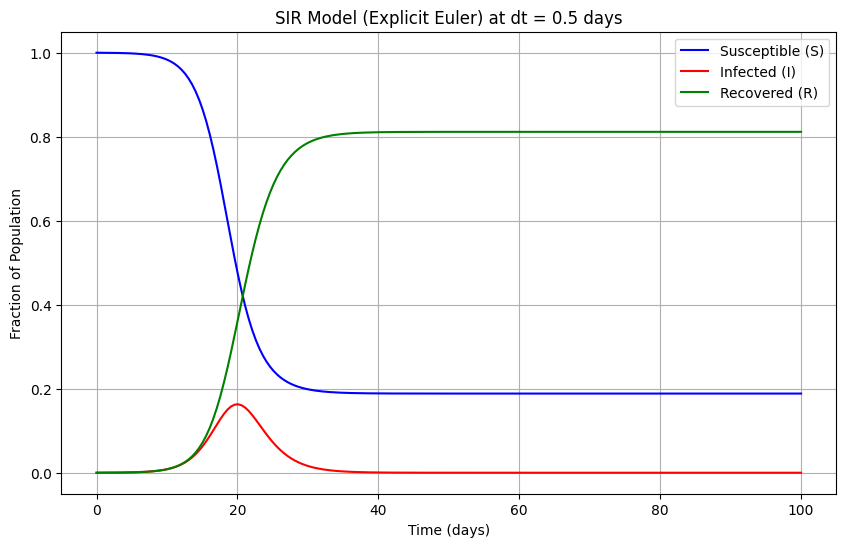

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
r = 1.0       # Infection rate
a = 0.5       # Recovery rate
I0 = 0.0001   # Initial infected fraction
S0 = 1 - I0   # Initial susceptible fraction
R0 = 0.0      # Initial recovered fraction

# Theoretical maximum infected fraction (for reference)
q = r / a
Imax = I0 + S0 - (1 + np.log(q * S0)) / q
print(f"Theoretical maximum infected fraction: {Imax:.4f}")

# Time settings
t_start = 0
t_end = 100    # Simulate for 25 days
h = 0.5       # Step size (Explicit Euler requires small h)
num_steps = int((t_end - t_start) / h)

# Initialize arrays
t = np.linspace(t_start, t_end, num_steps)
S = np.zeros(num_steps)
I = np.zeros(num_steps)
R = np.zeros(num_steps)

# Set initial conditions
S[0] = S0
I[0] = I0
R[0] = R0

# Explicit Euler loop
for n in range(num_steps - 1):
    S[n+1] = S[n] + h * (-r * S[n] * I[n])
    I[n+1] = I[n] + h * (r * S[n] * I[n] - a * I[n])
    R[n+1] = R[n] + h * (a * I[n])

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible (S)', color='blue')
plt.plot(t, I, label='Infected (I)', color='red')
plt.plot(t, R, label='Recovered (R)', color='green')
#plt.axhline(y=Imax, color='gray', linestyle='--', label='Theoretical $I_{max}$')
plt.xlabel('Time (days)')
plt.ylabel('Fraction of Population')
plt.title('SIR Model (Explicit Euler) at dt = 0.5 days')
plt.legend()
plt.grid()
plt.show()

**Question 3. Investigate the stability of the scheme by altering the time step size.**

Theoretical maximum infected fraction: 0.1535


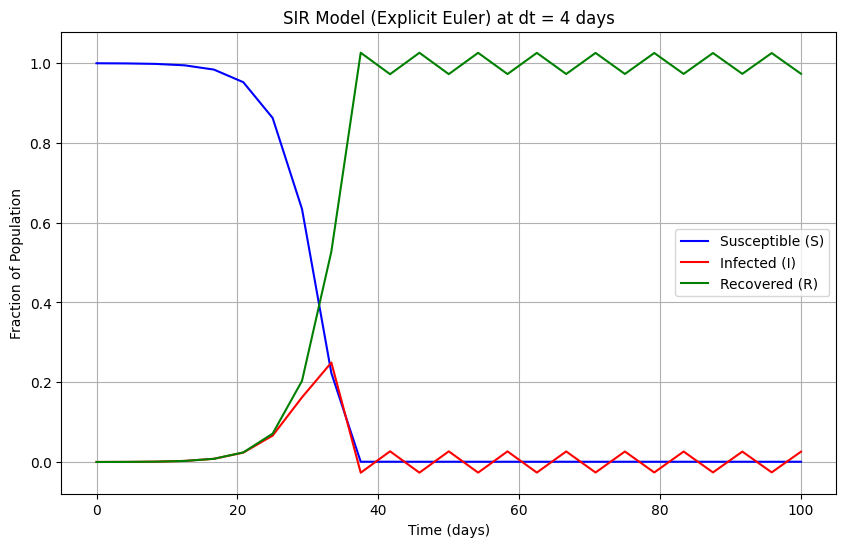

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
r = 1.0       # Infection rate
a = 0.5       # Recovery rate
I0 = 0.0001   # Initial infected fraction
S0 = 1 - I0   # Initial susceptible fraction
R0 = 0.0      # Initial recovered fraction

# Theoretical maximum infected fraction (for reference)
q = r / a
Imax = I0 + S0 - (1 + np.log(q * S0)) / q
print(f"Theoretical maximum infected fraction: {Imax:.4f}")

# Time settings
t_start = 0
t_end = 100    # Simulate for 25 days
h = 4       # Step size (Explicit Euler requires small h)
num_steps = int((t_end - t_start) / h)

# Initialize arrays
t = np.linspace(t_start, t_end, num_steps)
S = np.zeros(num_steps)
I = np.zeros(num_steps)
R = np.zeros(num_steps)

# Set initial conditions
S[0] = S0
I[0] = I0
R[0] = R0

# Explicit Euler loop
for n in range(num_steps - 1):
    S[n+1] = S[n] + h * (-r * S[n] * I[n])
    I[n+1] = I[n] + h * (r * S[n] * I[n] - a * I[n])
    R[n+1] = R[n] + h * (a * I[n])

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible (S)', color='blue')
plt.plot(t, I, label='Infected (I)', color='red')
plt.plot(t, R, label='Recovered (R)', color='green')
#plt.axhline(y=Imax, color='gray', linestyle='--', label='Theoretical $I_{max}$')
plt.xlabel('Time (days)')
plt.ylabel('Fraction of Population')
plt.title('SIR Model (Explicit Euler) at dt = 4 days')
plt.legend()
plt.grid()
plt.show()

**Question 4: Investigate the accuracy of the scheme by comparing the maximum of infected Imax between your scheme and the analytic maximum.**

Analytic I_max: 0.153476
Numerical I_max (Explicit Euler): 0.249336
Relative Error: 62.4588%


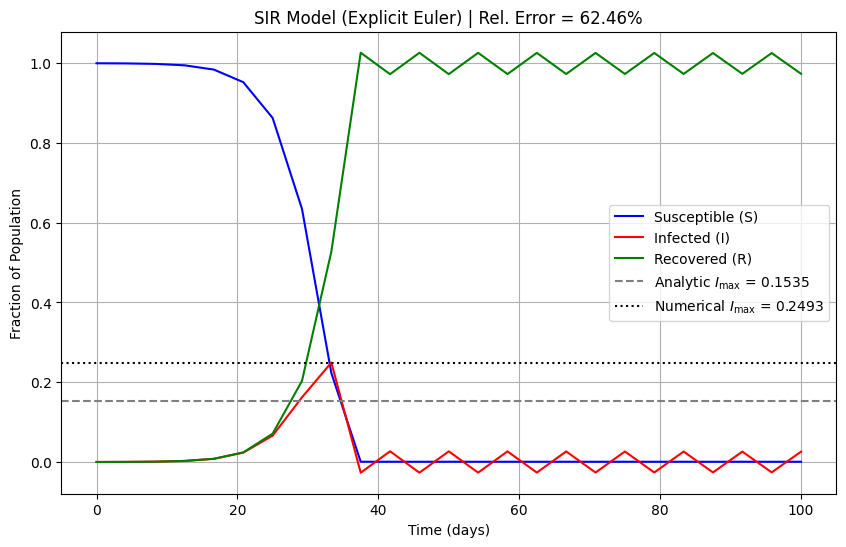

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
r = 1.0       # Infection rate
a = 0.5       # Recovery rate
I0 = 0.0001   # Initial infected fraction
S0 = 1 - I0   # Initial susceptible fraction
R0 = 0.0      # Initial recovered fraction

# Theoretical maximum infected fraction
q = r / a
Imax_analytic = I0 + S0 - (1 + np.log(q * S0)) / q
print(f"Analytic I_max: {Imax_analytic:.6f}")

# Time settings
t_start = 0
t_end = 100    # Simulate for 25 days
h = 4       # Step size
num_steps = int((t_end - t_start) / h)

# Initialize arrays
t = np.linspace(t_start, t_end, num_steps)
S = np.zeros(num_steps)
I = np.zeros(num_steps)
R = np.zeros(num_steps)

# Set initial conditions
S[0] = S0
I[0] = I0
R[0] = R0

# Explicit Euler loop
for n in range(num_steps - 1):
    S[n+1] = S[n] + h * (-r * S[n] * I[n])
    I[n+1] = I[n] + h * (r * S[n] * I[n] - a * I[n])
    R[n+1] = R[n] + h * (a * I[n])

# Find numerical I_max
Imax_numeric = np.max(I)
print(f"Numerical I_max (Explicit Euler): {Imax_numeric:.6f}")

# Compute relative error
relative_error = np.abs(Imax_numeric - Imax_analytic) / Imax_analytic
print(f"Relative Error: {relative_error * 100:.4f}%")

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(t, S, label='Susceptible (S)', color='blue')
plt.plot(t, I, label='Infected (I)', color='red')
plt.plot(t, R, label='Recovered (R)', color='green')
plt.axhline(y=Imax_analytic, color='gray', linestyle='--', label=f'Analytic $I_{{\max}}$ = {Imax_analytic:.4f}')
plt.axhline(y=Imax_numeric, color='black', linestyle=':', label=f'Numerical $I_{{\max}}$ = {Imax_numeric:.4f}')
plt.xlabel('Time (days)')
plt.ylabel('Fraction of Population')
plt.title(f'SIR Model (Explicit Euler) | Rel. Error = {relative_error * 100:.2f}%')
plt.legend()
plt.grid()
plt.show()

**Question 5: Do this for different time step sizes and analyze how the error and step size arescaling (try on log-log plot).**


h = 0.500 | Numerical I_max = 0.162915 | Error = 6.1498%
h = 0.200 | Numerical I_max = 0.157183 | Error = 2.4148%
h = 0.100 | Numerical I_max = 0.155319 | Error = 1.2005%
h = 0.050 | Numerical I_max = 0.154392 | Error = 0.5963%
h = 0.010 | Numerical I_max = 0.153659 | Error = 0.1191%
h = 0.005 | Numerical I_max = 0.153568 | Error = 0.0595%


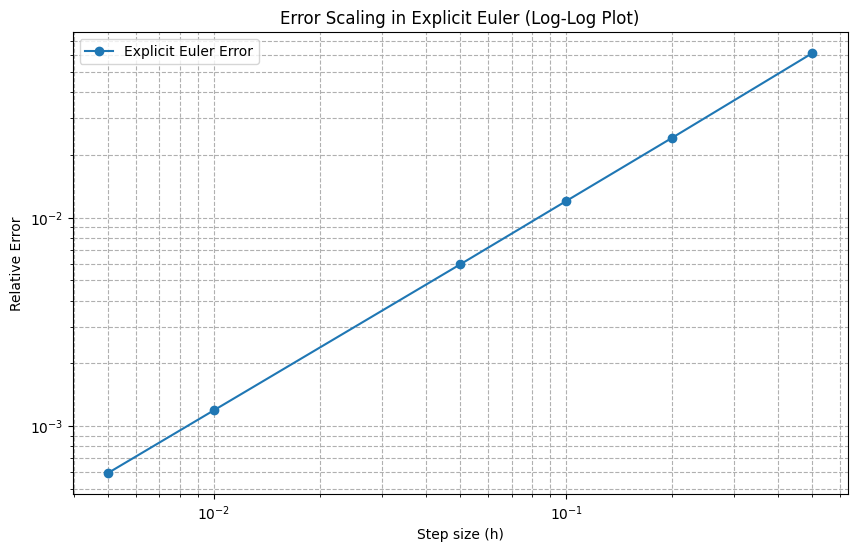

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
r = 1.0
a = 0.5
I0 = 0.0001
S0 = 1 - I0
R0 = 0.0
t_end = 25  # Simulation time

# Analytic solution for I_max
q = r / a
Imax_analytic = I0 + S0 - (1 + np.log(q * S0)) / q

# List of step sizes to test
h_list = [0.5, 0.2, 0.1, 0.05, 0.01, 0.005]
errors = []

for h in h_list:
    num_steps = int(t_end / h)
    t = np.linspace(0, t_end, num_steps)
    S = np.zeros(num_steps)
    I = np.zeros(num_steps)
    R = np.zeros(num_steps)
    
    # Initial conditions
    S[0] = S0
    I[0] = I0
    R[0] = R0

    # Explicit Euler loop
    for n in range(num_steps - 1):
        S[n+1] = S[n] + h * (-r * S[n] * I[n])
        I[n+1] = I[n] + h * (r * S[n] * I[n] - a * I[n])
        R[n+1] = R[n] + h * (a * I[n])

    # Numerical I_max and error
    Imax_numeric = np.max(I)
    relative_error = np.abs(Imax_numeric - Imax_analytic) / Imax_analytic
    errors.append(relative_error)
    print(f"h = {h:.3f} | Numerical I_max = {Imax_numeric:.6f} | Error = {relative_error * 100:.4f}%")

# Plot error vs. step size (log-log)
plt.figure(figsize=(10, 6))
plt.loglog(h_list, errors, 'o-', label='Explicit Euler Error')
plt.xlabel('Step size (h)')
plt.ylabel('Relative Error')
plt.title('Error Scaling in Explicit Euler (Log-Log Plot)')
plt.grid(True, which="both", ls="--")

# Add reference line for 1st-order convergence (slope = 1)
ref_h = np.array(h_list)
ref_error = ref_h  # Linear scaling (O(h))
plt.loglog(ref_h, ref_error, 'k--', label='Reference O(h)')

plt.legend()
plt.show()

**Question 6. Try another explicit scheme (e.g. Runge Kutta) and investigate its stability and accuracy**

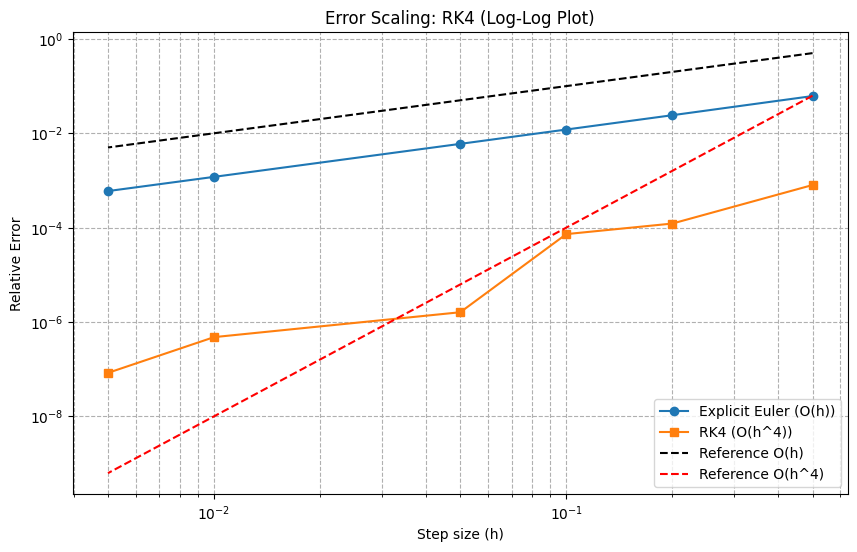

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
r = 1.0
a = 0.5
I0 = 0.0001
S0 = 1 - I0
R0 = 0.0
t_end = 25

# Analytic I_max
q = r / a
Imax_analytic = I0 + S0 - (1 + np.log(q * S0)) / q

# Step sizes to test
h_list = [0.5, 0.2, 0.1, 0.05, 0.01, 0.005]

# Initialize error storage
errors_euler = []
errors_rk4 = []

def sir_derivatives(S, I, R):
    dSdt = -r * S * I
    dIdt = r * S * I - a * I
    dRdt = a * I
    return dSdt, dIdt, dRdt

for h in h_list:
    num_steps = int(t_end / h)
    t = np.linspace(0, t_end, num_steps)
    
    # Arrays for Euler and RK4
    S_euler, I_euler, R_euler = np.zeros(num_steps), np.zeros(num_steps), np.zeros(num_steps)
    S_rk4, I_rk4, R_rk4 = np.zeros(num_steps), np.zeros(num_steps), np.zeros(num_steps)
    
    # Initial conditions
    S_euler[0], I_euler[0], R_euler[0] = S0, I0, R0
    S_rk4[0], I_rk4[0], R_rk4[0] = S0, I0, R0

    # Explicit Euler
    for n in range(num_steps - 1):
        dS, dI, dR = sir_derivatives(S_euler[n], I_euler[n], R_euler[n])
        S_euler[n+1] = S_euler[n] + h * dS
        I_euler[n+1] = I_euler[n] + h * dI
        R_euler[n+1] = R_euler[n] + h * dR

    # RK4
    for n in range(num_steps - 1):
        S, I, R = S_rk4[n], I_rk4[n], R_rk4[n]
        
        # RK4 intermediate steps
        k1_S, k1_I, k1_R = sir_derivatives(S, I, R)
        k2_S, k2_I, k2_R = sir_derivatives(S + 0.5 * h * k1_S, I + 0.5 * h * k1_I, R + 0.5 * h * k1_R)
        k3_S, k3_I, k3_R = sir_derivatives(S + 0.5 * h * k2_S, I + 0.5 * h * k2_I, R + 0.5 * h * k2_R)
        k4_S, k4_I, k4_R = sir_derivatives(S + h * k3_S, I + h * k3_I, R + h * k3_R)
        
        # Update
        S_rk4[n+1] = S + (h / 6) * (k1_S + 2 * k2_S + 2 * k3_S + k4_S)
        I_rk4[n+1] = I + (h / 6) * (k1_I + 2 * k2_I + 2 * k3_I + k4_I)
        R_rk4[n+1] = R + (h / 6) * (k1_R + 2 * k2_R + 2 * k3_R + k4_R)

    # Compute errors
    Imax_euler = np.max(I_euler)
    Imax_rk4 = np.max(I_rk4)
    errors_euler.append(np.abs(Imax_euler - Imax_analytic) / Imax_analytic)
    errors_rk4.append(np.abs(Imax_rk4 - Imax_analytic) / Imax_analytic)

# Plot error vs. step size (log-log)
plt.figure(figsize=(10, 6))
plt.loglog(h_list, errors_euler, 'o-', label='Explicit Euler (O(h))')
plt.loglog(h_list, errors_rk4, 's-', label='RK4 (O(h^4))')
plt.xlabel('Step size (h)')
plt.ylabel('Relative Error')
plt.title('Error Scaling: RK4 (Log-Log Plot)')
plt.grid(True, which="both", ls="--")

# Add reference lines for slope
ref_h = np.array(h_list)
plt.loglog(ref_h, ref_h, 'k--', label='Reference O(h)')
plt.loglog(ref_h, ref_h**4, 'r--', label='Reference O(h^4)')

plt.legend()
plt.show()

**Comparing Euler, RK2, and RK4 methods for the SIR model**

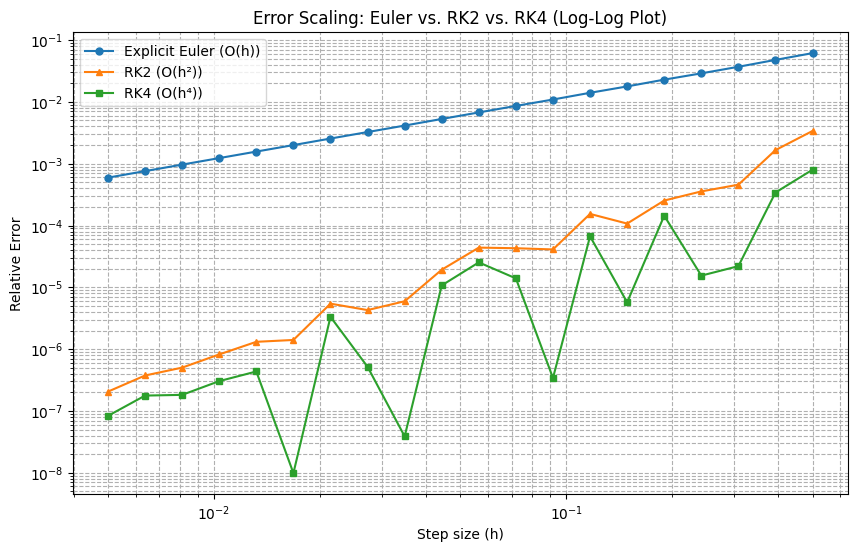

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
r = 1.0
a = 0.5
I0 = 0.0001
S0 = 1 - I0
R0 = 0.0
t_end = 25

# Analytic I_max
q = r / a
Imax_analytic = I0 + S0 - (1 + np.log(q * S0)) / q

# Step sizes (log-spaced for smoother curves)
h_list = np.logspace(np.log10(0.005), np.log10(0.5), 20)  # 20 points between 0.005 and 0.5

# Initialize error storage
errors_euler = []
errors_rk2 = []
errors_rk4 = []

def sir_derivatives(S, I, R):
    dSdt = -r * S * I
    dIdt = r * S * I - a * I
    dRdt = a * I
    return dSdt, dIdt, dRdt

for h in h_list:
    num_steps = int(t_end / h)
    t = np.linspace(0, t_end, num_steps)
    
    # Arrays for Euler, RK2, and RK4
    S_euler, I_euler, R_euler = np.zeros(num_steps), np.zeros(num_steps), np.zeros(num_steps)
    S_rk2, I_rk2, R_rk2 = np.zeros(num_steps), np.zeros(num_steps), np.zeros(num_steps)
    S_rk4, I_rk4, R_rk4 = np.zeros(num_steps), np.zeros(num_steps), np.zeros(num_steps)
    
    # Initial conditions
    S_euler[0], I_euler[0], R_euler[0] = S0, I0, R0
    S_rk2[0], I_rk2[0], R_rk2[0] = S0, I0, R0
    S_rk4[0], I_rk4[0], R_rk4[0] = S0, I0, R0

    # Explicit Euler
    for n in range(num_steps - 1):
        dS, dI, dR = sir_derivatives(S_euler[n], I_euler[n], R_euler[n])
        S_euler[n+1] = S_euler[n] + h * dS
        I_euler[n+1] = I_euler[n] + h * dI
        R_euler[n+1] = R_euler[n] + h * dR

    # RK2 (Heun's Method)
    for n in range(num_steps - 1):
        S, I, R = S_rk2[n], I_rk2[n], R_rk2[n]
        # Step 1: Compute slope at current point
        k1_S, k1_I, k1_R = sir_derivatives(S, I, R)
        # Step 2: Compute slope at Euler-predicted point
        S_temp = S + h * k1_S
        I_temp = I + h * k1_I
        R_temp = R + h * k1_R
        k2_S, k2_I, k2_R = sir_derivatives(S_temp, I_temp, R_temp)
        # Update using average of k1 and k2
        S_rk2[n+1] = S + (h / 2) * (k1_S + k2_S)
        I_rk2[n+1] = I + (h / 2) * (k1_I + k2_I)
        R_rk2[n+1] = R + (h / 2) * (k1_R + k2_R)

    # RK4
    for n in range(num_steps - 1):
        S, I, R = S_rk4[n], I_rk4[n], R_rk4[n]
        # Intermediate slopes
        k1_S, k1_I, k1_R = sir_derivatives(S, I, R)
        k2_S, k2_I, k2_R = sir_derivatives(S + 0.5*h*k1_S, I + 0.5*h*k1_I, R + 0.5*h*k1_R)
        k3_S, k3_I, k3_R = sir_derivatives(S + 0.5*h*k2_S, I + 0.5*h*k2_I, R + 0.5*h*k2_R)
        k4_S, k4_I, k4_R = sir_derivatives(S + h*k3_S, I + h*k3_I, R + h*k3_R)
        # Update
        S_rk4[n+1] = S + (h / 6) * (k1_S + 2*k2_S + 2*k3_S + k4_S)
        I_rk4[n+1] = I + (h / 6) * (k1_I + 2*k2_I + 2*k3_I + k4_I)
        R_rk4[n+1] = R + (h / 6) * (k1_R + 2*k2_R + 2*k3_R + k4_R)

    # Compute errors
    Imax_euler = np.max(I_euler)
    Imax_rk2 = np.max(I_rk2)
    Imax_rk4 = np.max(I_rk4)
    errors_euler.append(np.abs(Imax_euler - Imax_analytic) / Imax_analytic)
    errors_rk2.append(np.abs(Imax_rk2 - Imax_analytic) / Imax_analytic)
    errors_rk4.append(np.abs(Imax_rk4 - Imax_analytic) / Imax_analytic)

# Plot error vs. step size (log-log)
plt.figure(figsize=(10, 6))
plt.loglog(h_list, errors_euler, 'o-', label='Explicit Euler (O(h))', markersize=5)
plt.loglog(h_list, errors_rk2, '^-', label='RK2 (O(h²))', markersize=5)
plt.loglog(h_list, errors_rk4, 's-', label='RK4 (O(h⁴))', markersize=5)
plt.xlabel('Step size (h)')
plt.ylabel('Relative Error')
plt.title('Error Scaling: Euler vs. RK2 vs. RK4 (Log-Log Plot)')
plt.grid(True, which="both", ls="--")

# Add reference lines for slope
# ref_h = np.array(h_list)
# plt.loglog(ref_h, ref_h, 'k--', label='Reference O(h)')
# plt.loglog(ref_h, ref_h**2, 'b--', label='Reference O(h²)')
# plt.loglog(ref_h, ref_h**4, 'r--', label='Reference O(h⁴)')

plt.legend()
plt.show()

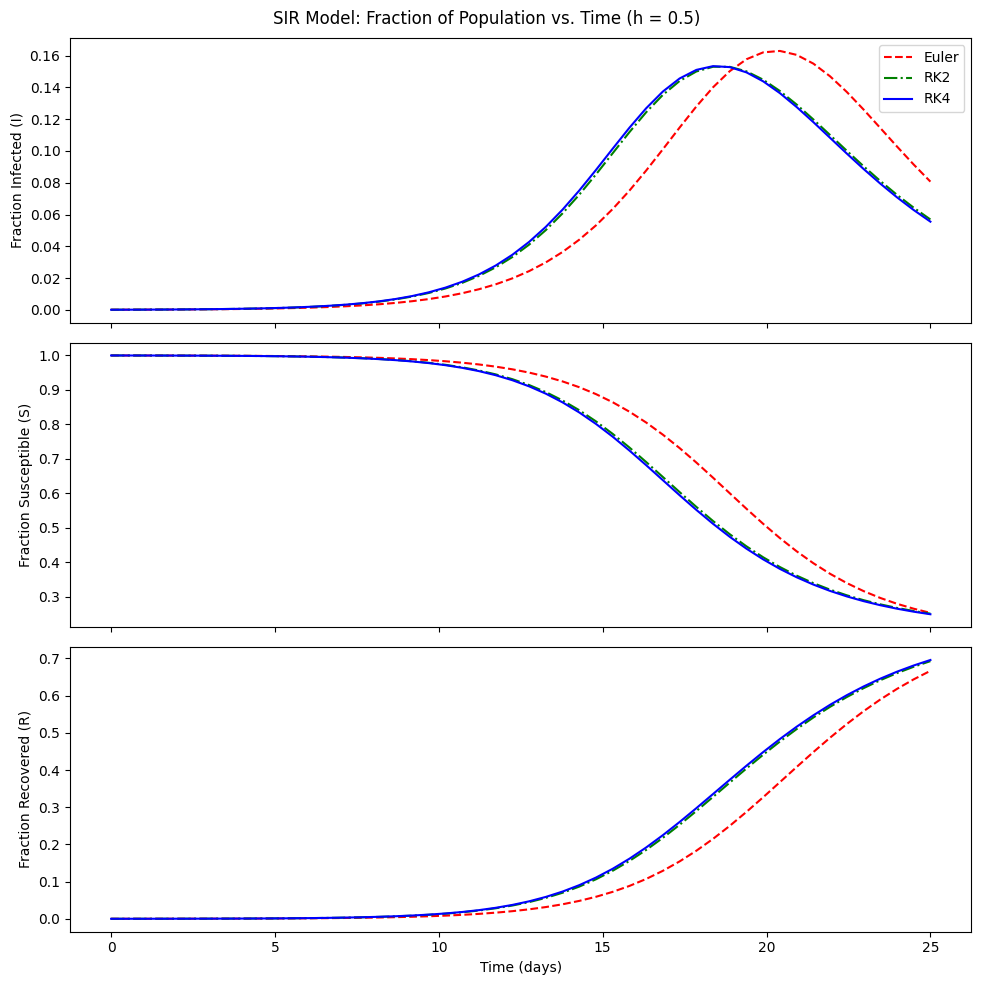

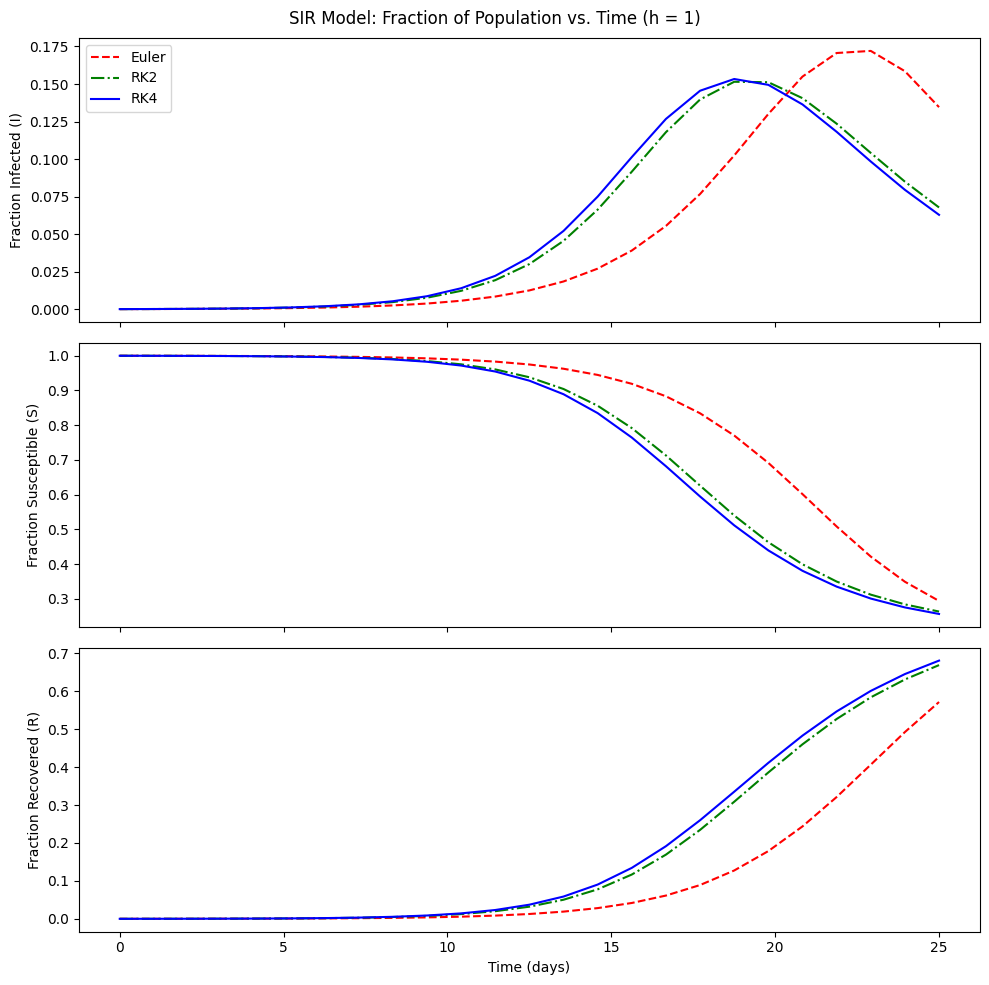

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
r = 1.0
a = 0.5
I0 = 0.0001
S0 = 1 - I0
R0 = 0.0
t_end = 25

# Step sizes
h_list = [0.5, 1]

# Plotting function
def simulate_and_plot(h):
    num_steps = int(t_end / h)
    t = np.linspace(0, t_end, num_steps)

    def sir_derivatives(S, I, R):
        dSdt = -r * S * I
        dIdt = r * S * I - a * I
        dRdt = a * I
        return dSdt, dIdt, dRdt

    S_euler, I_euler, R_euler = np.zeros(num_steps), np.zeros(num_steps), np.zeros(num_steps)
    S_rk2, I_rk2, R_rk2 = np.zeros(num_steps), np.zeros(num_steps), np.zeros(num_steps)
    S_rk4, I_rk4, R_rk4 = np.zeros(num_steps), np.zeros(num_steps), np.zeros(num_steps)

    S_euler[0], I_euler[0], R_euler[0] = S0, I0, R0
    S_rk2[0], I_rk2[0], R_rk2[0] = S0, I0, R0
    S_rk4[0], I_rk4[0], R_rk4[0] = S0, I0, R0

    for n in range(num_steps - 1):
        dS, dI, dR = sir_derivatives(S_euler[n], I_euler[n], R_euler[n])
        S_euler[n+1] = S_euler[n] + h * dS
        I_euler[n+1] = I_euler[n] + h * dI
        R_euler[n+1] = R_euler[n] + h * dR

    for n in range(num_steps - 1):
        S, I, R = S_rk2[n], I_rk2[n], R_rk2[n]
        k1_S, k1_I, k1_R = sir_derivatives(S, I, R)
        k2_S, k2_I, k2_R = sir_derivatives(S + h * k1_S, I + h * k1_I, R + h * k1_R)
        S_rk2[n+1] = S + (h / 2) * (k1_S + k2_S)
        I_rk2[n+1] = I + (h / 2) * (k1_I + k2_I)
        R_rk2[n+1] = R + (h / 2) * (k1_R + k2_R)

    for n in range(num_steps - 1):
        S, I, R = S_rk4[n], I_rk4[n], R_rk4[n]
        k1_S, k1_I, k1_R = sir_derivatives(S, I, R)
        k2_S, k2_I, k2_R = sir_derivatives(S + 0.5 * h * k1_S, I + 0.5 * h * k1_I, R + 0.5 * h * k1_R)
        k3_S, k3_I, k3_R = sir_derivatives(S + 0.5 * h * k2_S, I + 0.5 * h * k2_I, R + 0.5 * h * k2_R)
        k4_S, k4_I, k4_R = sir_derivatives(S + h * k3_S, I + h * k3_I, R + h * k3_R)
        S_rk4[n+1] = S + (h / 6) * (k1_S + 2 * k2_S + 2 * k3_S + k4_S)
        I_rk4[n+1] = I + (h / 6) * (k1_I + 2 * k2_I + 2 * k3_I + k4_I)
        R_rk4[n+1] = R + (h / 6) * (k1_R + 2 * k2_R + 2 * k3_R + k4_R)

    # Create a new figure for each h
    fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
    plt.suptitle(f'SIR Model: Fraction of Population vs. Time (h = {h})')

    axes[0].plot(t, I_euler, '--r', label='Euler')
    axes[0].plot(t, I_rk2, '-.g', label='RK2')
    axes[0].plot(t, I_rk4, '-b', label='RK4')
    axes[0].set_ylabel('Fraction Infected (I)')
    axes[0].legend()

    axes[1].plot(t, S_euler, '--r')
    axes[1].plot(t, S_rk2, '-.g')
    axes[1].plot(t, S_rk4, '-b')
    axes[1].set_ylabel('Fraction Susceptible (S)')

    axes[2].plot(t, R_euler, '--r')
    axes[2].plot(t, R_rk2, '-.g')
    axes[2].plot(t, R_rk4, '-b')
    axes[2].set_ylabel('Fraction Recovered (R)')
    axes[2].set_xlabel('Time (days)')

    plt.tight_layout()
    plt.show()

# Generate plots for both step sizes
for h in h_list:
    simulate_and_plot(h)


**Question 7: Code the implicit Euler scheme. Realize that at every time step, you need to solve for S(i + 1) using a solver like  Python's ’fsolve’.**


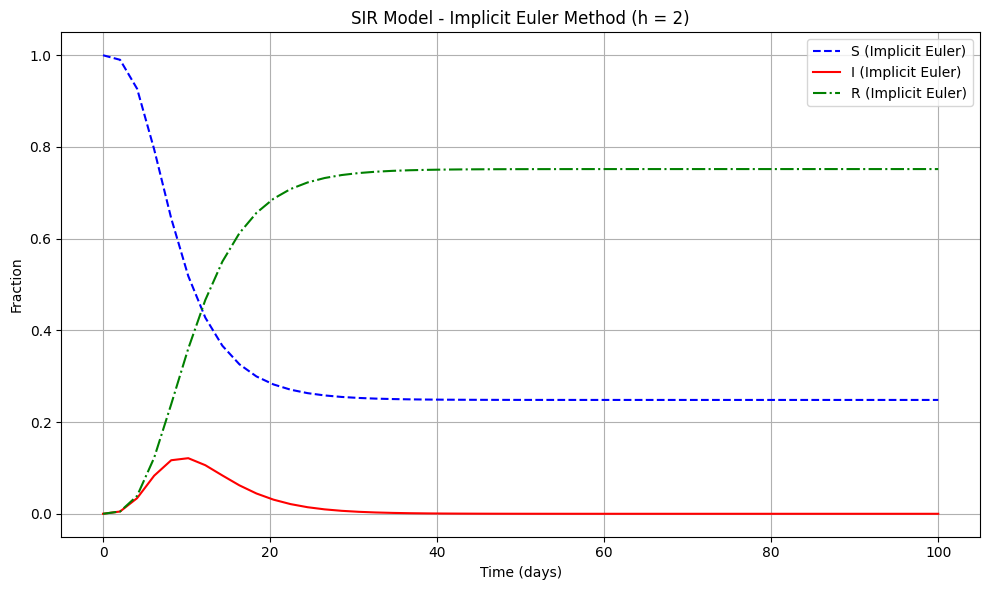

Implicit Euler peak infected: 0.121261
Theoretical maximum infected fraction: 0.153476
Relative Error: 20.9902%
Computation time: 0.0033 seconds


In [39]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import time

# Parameters
r = 1.0
a = 0.5
q = r / a
I0 = 0.0001
S0 = 1 - I0
R0 = 0.0
t_end = 100 # Simulation time (days)
h = 2  # change to 0.005 to compare later

Imax = I0 + S0 - (1 + np.log(q * S0)) / q
#print(f"Theoretical maximum infected fraction: {Imax:.6f}")

# Derivatives
def sir_derivatives(S, I, R):
    dSdt = -r * S * I
    dIdt = r * S * I - a * I
    dRdt = a * I
    return dSdt, dIdt, dRdt

# Implicit Euler step function
def implicit_step(S_prev, I_prev, R_prev, h):
    def equations(vars):
        S, I, R = vars
        f1 = S - S_prev + h * r * S * I
        f2 = I - I_prev - h * (r * S * I - a * I)
        f3 = R - R_prev - h * a * I
        return [f1, f2, f3]

    guess = [S_prev, I_prev, R_prev]
    S_next, I_next, R_next = fsolve(equations, guess)
    return S_next, I_next, R_next

# Time steps
num_steps = int(t_end / h)
t = np.linspace(0, t_end, num_steps)

# Arrays
S_imp, I_imp, R_imp = np.zeros(num_steps), np.zeros(num_steps), np.zeros(num_steps)
S_imp[0], I_imp[0], R_imp[0] = S0, I0, R0

# Timing
start = time.time()

# Solve
for n in range(num_steps - 1):
    S_imp[n+1], I_imp[n+1], R_imp[n+1] = implicit_step(S_imp[n], I_imp[n], R_imp[n], h)

end = time.time()


# Plot
plt.figure(figsize=(10, 6))
plt.plot(t, S_imp, label='S (Implicit Euler)', linestyle='--', color='blue')
plt.plot(t, I_imp, label='I (Implicit Euler)', linestyle='-', color='red')
plt.plot(t, R_imp, label='R (Implicit Euler)', linestyle='-.', color='green')
plt.title(f"SIR Model - Implicit Euler Method (h = {h})")
plt.xlabel("Time (days)")
plt.ylabel("Fraction")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Metrics
I_peak = np.max(I_imp)
print(f"Implicit Euler peak infected: {I_peak:.6f}")
print(f"Theoretical maximum infected fraction: {Imax:.6f}")
# Compute relative error
relative_error = np.abs(I_peak - Imax_analytic) / Imax_analytic
print(f"Relative Error: {relative_error * 100:.4f}%")
print(f"Computation time: {end - start:.4f} seconds")



 **Question 8: Analyze the stability, accuracy, and computation time for this method and compare with the other methods.**

Theoretical maximum infected fraction: 0.153476

Step size h = 0.5
RK4 peak infected: 0.153354
Implicit peak infected: 0.144626
RK4 computation time: 0.0000 s
Implicit computation time: 0.0020 s
RK4 Relative Error to Imax: 0.0799%
Implicit Euler Relative Error to Imax: 5.7667%
------------------------------------------------------------

Step size h = 2
RK4 peak infected: 0.153257
Implicit peak infected: 0.121261
RK4 computation time: 0.0000 s
Implicit computation time: 0.0000 s
RK4 Relative Error to Imax: 0.1427%
Implicit Euler Relative Error to Imax: 20.9902%
------------------------------------------------------------


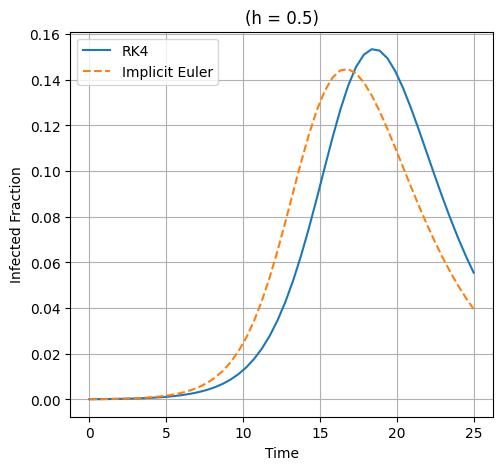

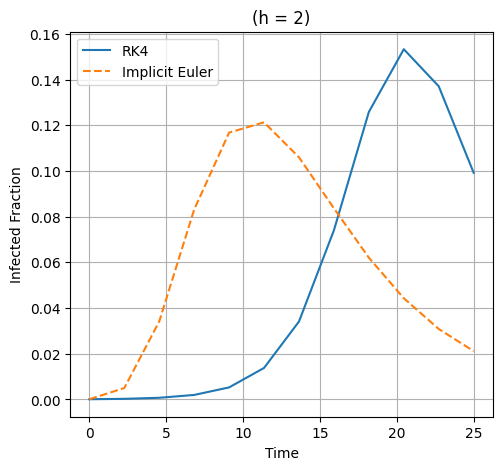

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import time

# Parameters
r = 1.0
a = 0.5
q = r / a
I0 = 0.0001
S0 = 1 - I0
R0 = 0.0
t_end = 25
h_values = [0.5, 2]

# Theoretical Imax
Imax_analytic = I0 + S0 - (1 + np.log(q * S0)) / q
print(f"Theoretical maximum infected fraction: {Imax_analytic:.6f}")

# Derivatives
def sir_derivatives(S, I, R):
    dSdt = -r * S * I
    dIdt = r * S * I - a * I
    dRdt = a * I
    return dSdt, dIdt, dRdt

# RK4 method
def rk4_step(S, I, R, h):
    k1_S, k1_I, k1_R = sir_derivatives(S, I, R)
    k2_S, k2_I, k2_R = sir_derivatives(S + 0.5*h*k1_S, I + 0.5*h*k1_I, R + 0.5*h*k1_R)
    k3_S, k3_I, k3_R = sir_derivatives(S + 0.5*h*k2_S, I + 0.5*h*k2_I, R + 0.5*h*k2_R)
    k4_S, k4_I, k4_R = sir_derivatives(S + h*k3_S, I + h*k3_I, R + h*k3_R)

    S_next = S + (h/6) * (k1_S + 2*k2_S + 2*k3_S + k4_S)
    I_next = I + (h/6) * (k1_I + 2*k2_I + 2*k3_I + k4_I)
    R_next = R + (h/6) * (k1_R + 2*k2_R + 2*k3_R + k4_R)
    return S_next, I_next, R_next

# Implicit Euler method
def implicit_step(S_prev, I_prev, R_prev, h):
    def equations(vars):
        S, I, R = vars
        f1 = S - S_prev + h * r * S * I
        f2 = I - I_prev - h * (r * S * I - a * I)
        f3 = R - R_prev - h * a * I
        return [f1, f2, f3]
    guess = [S_prev, I_prev, R_prev]
    S_next, I_next, R_next = fsolve(equations, guess)
    return S_next, I_next, R_next

# Run simulation for each method
def run_simulation(method, h):
    num_steps = int(t_end / h)
    t = np.linspace(0, t_end, num_steps)
    S, I, R = np.zeros(num_steps), np.zeros(num_steps), np.zeros(num_steps)
    S[0], I[0], R[0] = S0, I0, R0

    start_time = time.time()
    for n in range(num_steps - 1):
        if method == 'RK4':
            S[n+1], I[n+1], R[n+1] = rk4_step(S[n], I[n], R[n], h)
        elif method == 'Implicit':
            S[n+1], I[n+1], R[n+1] = implicit_step(S[n], I[n], R[n], h)
    elapsed = time.time() - start_time
    return t, I, np.max(I), elapsed

# Run and compare
for h in h_values:
    t_rk4, I_rk4, Imax_rk4, time_rk4 = run_simulation('RK4', h)
    t_imp, I_imp, Imax_imp, time_imp = run_simulation('Implicit', h)

    min_len = min(len(I_rk4), len(I_imp))
    rel_error_curve = np.abs(I_imp[:min_len] - I_rk4[:min_len]) / (I_rk4[:min_len] + 1e-12)

    # Plot comparison and error
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(t_rk4, I_rk4, label='RK4')
    plt.plot(t_imp, I_imp, '--', label='Implicit Euler')
    plt.title(f'(h = {h})')
    plt.xlabel('Time')
    plt.ylabel('Infected Fraction')
    plt.legend()
    plt.grid()

    # plt.subplot(1, 2, 2)
    # plt.plot(t_rk4[:min_len], rel_error_curve, 'purple')
    # #plt.title(f'Relative Error (Implicit vs RK4) (h = {h})')
    # plt.xlabel('Time')
    # plt.ylabel('Relative Error')
    # plt.grid()
    # plt.tight_layout()
    # plt.show()

    # Print results
    print(f"\nStep size h = {h}")
    print(f"RK4 peak infected: {Imax_rk4:.6f}")
    print(f"Implicit peak infected: {Imax_imp:.6f}")
    print(f"RK4 computation time: {time_rk4:.4f} s")
    print(f"Implicit computation time: {time_imp:.4f} s")
    # Relative error to theoretical max
    rel_error_rk4 = np.abs(Imax_rk4 - Imax_analytic) / Imax_analytic
    rel_error_imp = np.abs(Imax_imp - Imax_analytic) / Imax_analytic
    print(f"RK4 Relative Error to Imax: {rel_error_rk4 * 100:.4f}%")
    print(f"Implicit Euler Relative Error to Imax: {rel_error_imp * 100:.4f}%")
    print("-" * 60)


**Question 9: Use Matlabs own ODE45 solver as well, for comparison to your own schemes.**


Step size used: 0.2506
Computation time: 0.010581 seconds


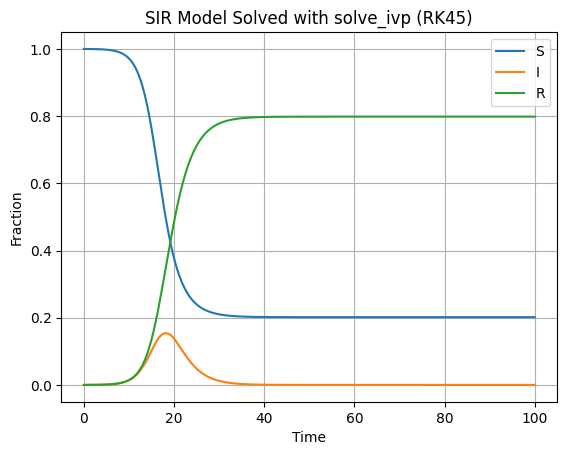

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import time

# Define the SIR model
def sir_model(t, y):
    S, I, R = y
    r = 1.0
    a = 0.5
    dSdt = -r * S * I
    dIdt = r * S * I - a * I
    dRdt = a * I
    return [dSdt, dIdt, dRdt]

# Initial conditions
y0 = [0.9999, 0.0001, 0.0]
t_start = 0
t_end = 100
num_points = 400
t_eval = np.linspace(t_start, t_end, num_points)

# Calculate step size
step_size = (t_end - t_start) / (num_points - 1)
print(f"Step size used: {step_size:.4f}")

# Solve and time it
start_time = time.time()
sol = solve_ivp(sir_model, (t_start, t_end), y0, method='RK45', t_eval=t_eval)
end_time = time.time()

print(f"Computation time: {end_time - start_time:.6f} seconds")

# Plot
plt.plot(sol.t, sol.y[0], label='S')
plt.plot(sol.t, sol.y[1], label='I')
plt.plot(sol.t, sol.y[2], label='R')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Fraction')
plt.title('SIR Model Solved with solve_ivp (RK45)')
plt.grid()
plt.show()


**Question 10: To understand the spread of a disease some better, see what changing I0 and some
other parameters does.**

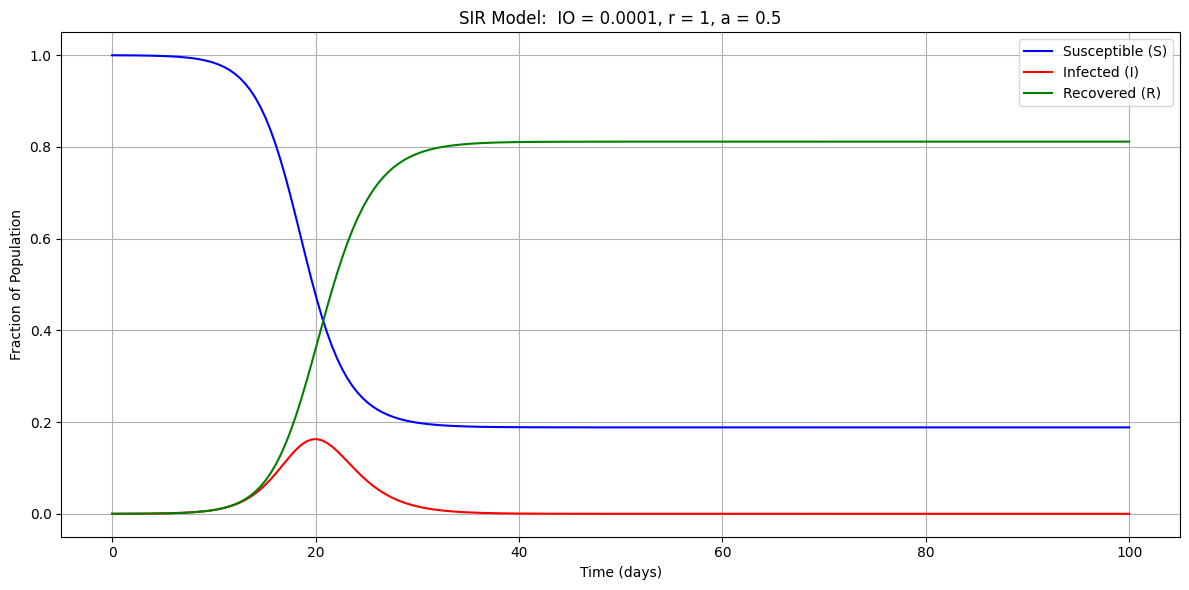

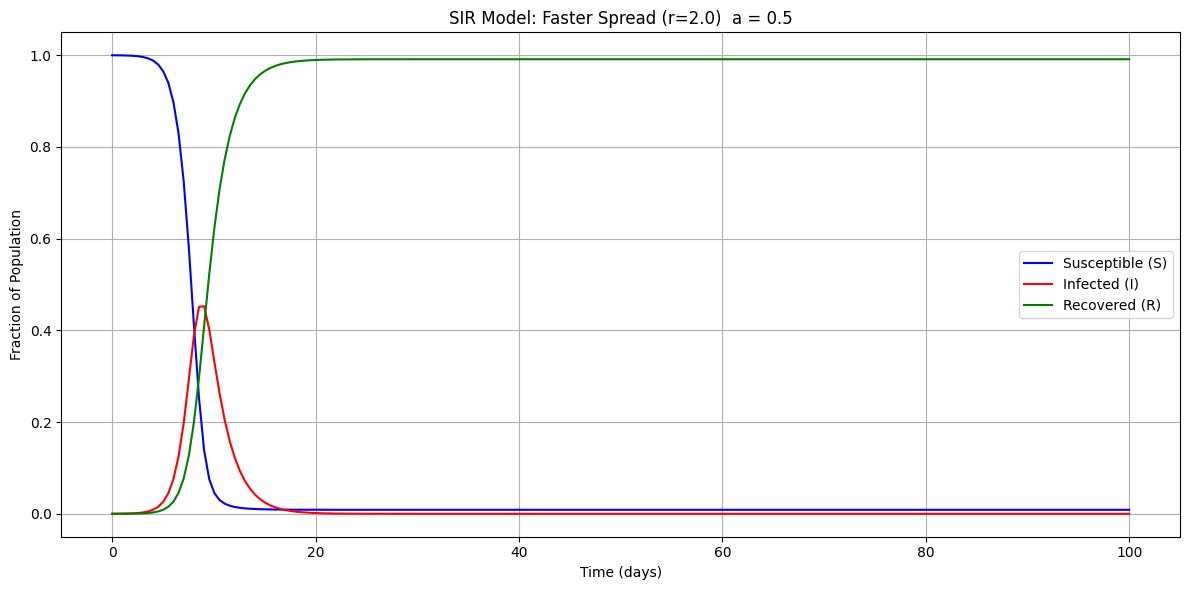

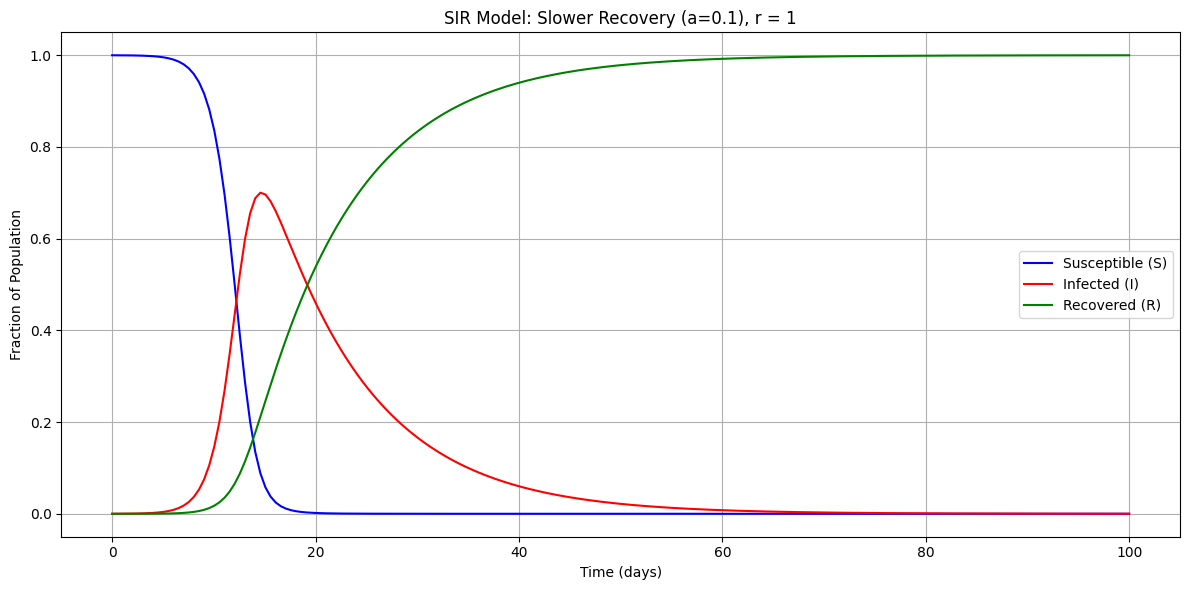

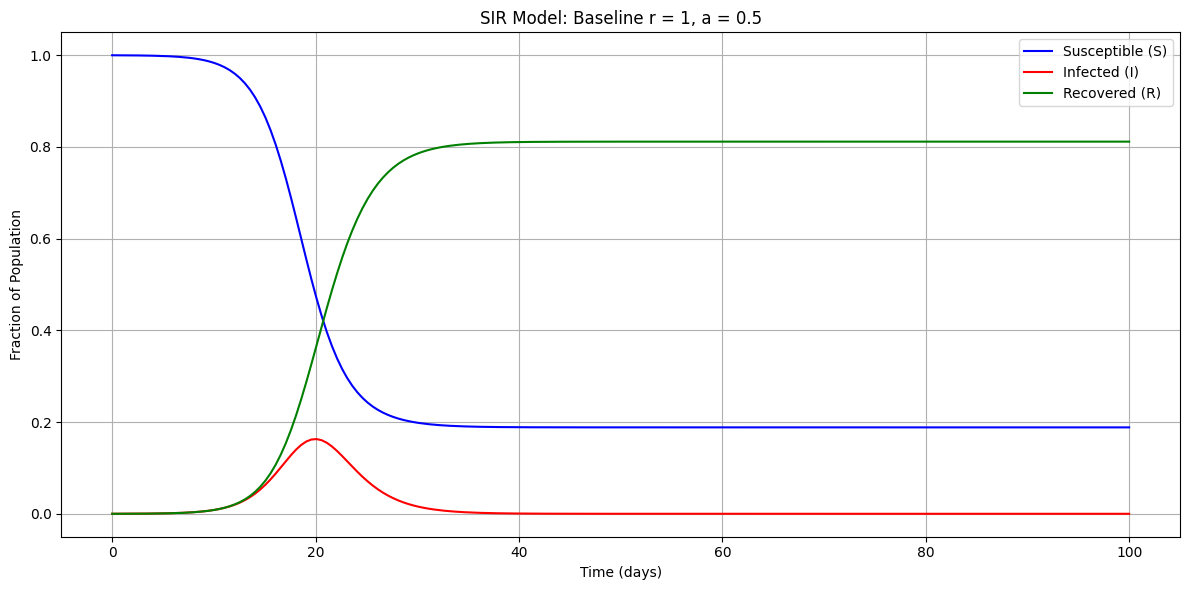

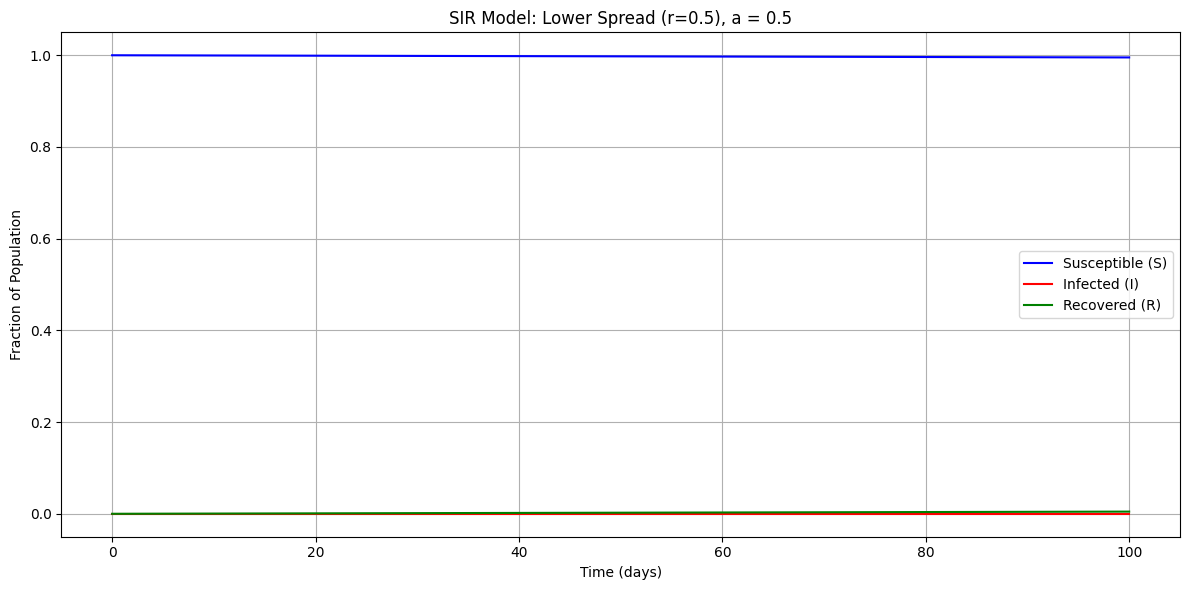

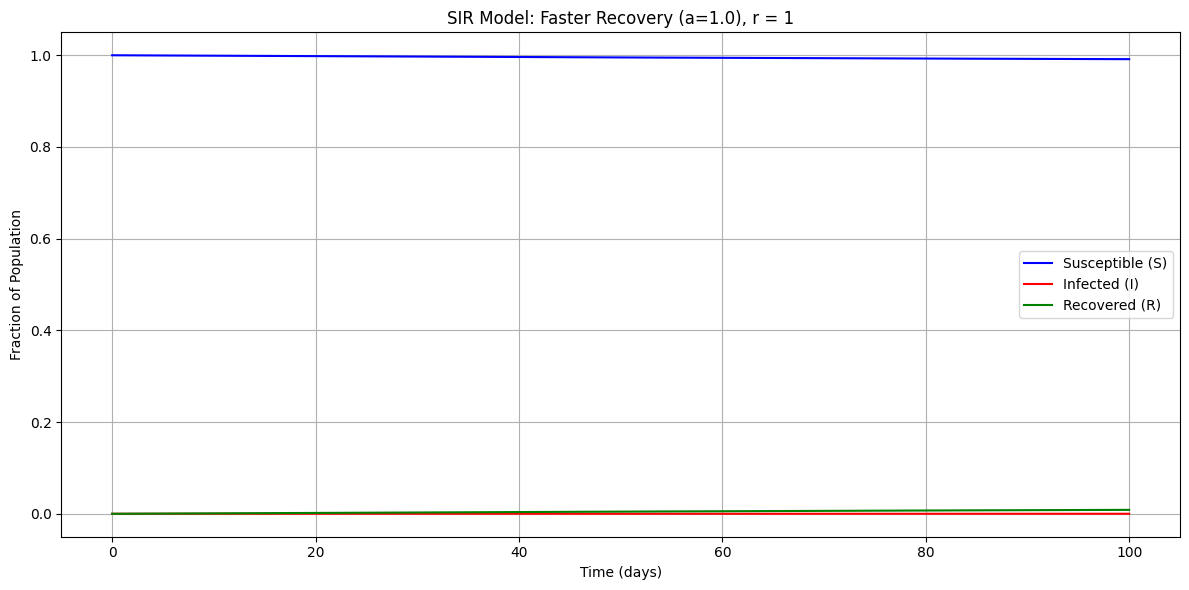

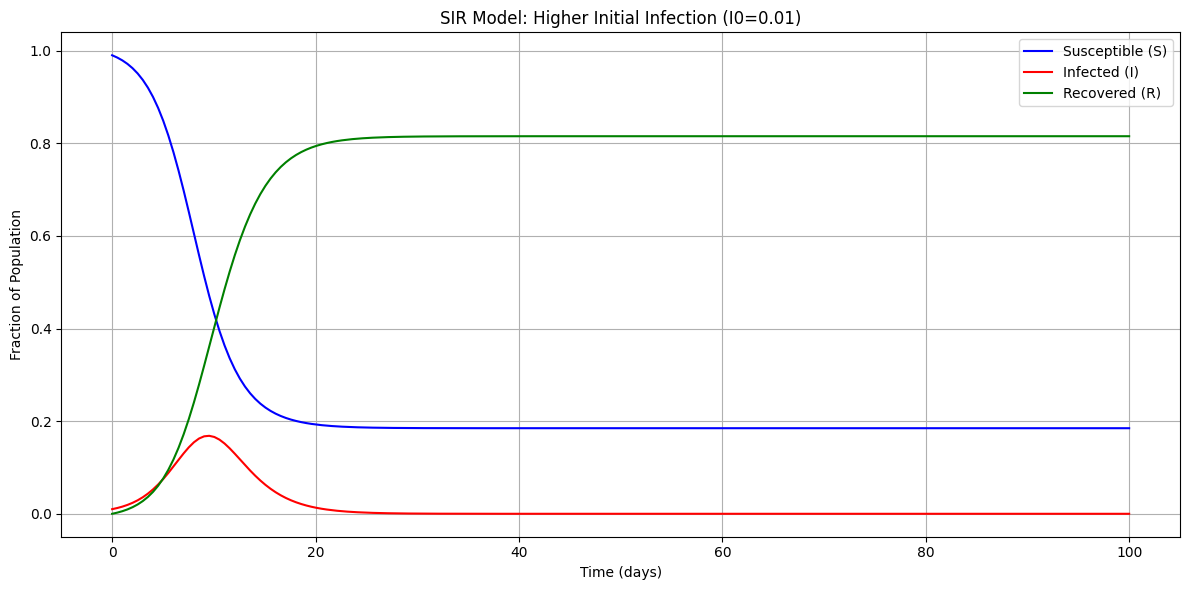

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Explicit Euler solver for the SIR model
def explicit_euler_sir(S0, I0, R0, r, a, t_start, t_end, h):
    num_steps = int((t_end - t_start) / h)
    t = np.linspace(t_start, t_end, num_steps)
    S = np.zeros(num_steps)
    I = np.zeros(num_steps)
    R = np.zeros(num_steps)

    S[0], I[0], R[0] = S0, I0, R0

    for n in range(num_steps - 1):
        S[n+1] = S[n] + h * (-r * S[n] * I[n])
        I[n+1] = I[n] + h * (r * S[n] * I[n] - a * I[n])
        R[n+1] = R[n] + h * (a * I[n])

    return t, S, I, R

# Settings
t_start = 0
t_end = 100
h = 0.5

# Baseline parameters
r_base = 1.0
a_base = 0.5
I0_base = 0.0001
S0_base = 1 - I0_base
R0_base = 0.0

# --- Plot 1: Faster Spread and Slower Recovery ---
scenarios_fast_slow = [
    {"label": " IO = 0.0001, r = 1, a = 0.5", "r": r_base, "a": a_base, "I0": I0_base},
    {"label": "Faster Spread (r=2.0)  a = 0.5", "r": 2.0, "a": a_base, "I0": I0_base},
    {"label": "Slower Recovery (a=0.1), r = 1", "r": r_base, "a": 0.1, "I0": I0_base}
]

for scenario in scenarios_fast_slow:
    t, S, I, R = explicit_euler_sir(
        S0=1 - scenario["I0"],
        I0=scenario["I0"],
        R0=0.0,
        r=scenario["r"],
        a=scenario["a"],
        t_start=t_start,
        t_end=t_end,
        h=h
    )

    plt.figure(figsize=(12, 6))
    plt.plot(t, S, label='Susceptible (S)', color='blue')
    plt.plot(t, I, label='Infected (I)', color='red')
    plt.plot(t, R, label='Recovered (R)', color='green')
    plt.xlabel('Time (days)')
    plt.ylabel('Fraction of Population')
    plt.title(f'SIR Model: {scenario["label"]}')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()

# --- Plot 2: Lower Spread, Faster Recovery, Higher Initial Infection ---
scenarios_low_fast_highI0 = [
    {"label": "Baseline r = 1, a = 0.5", "r": r_base, "a": a_base, "I0": I0_base},
    {"label": "Lower Spread (r=0.5), a = 0.5", "r": 0.5, "a": a_base, "I0": I0_base},
    {"label": "Faster Recovery (a=1.0), r = 1", "r": r_base, "a": 1.0, "I0": I0_base},
    {"label": "Higher Initial Infection (I0=0.01)", "r": r_base, "a": a_base, "I0": 0.01}
]

for scenario in scenarios_low_fast_highI0:
    t, S, I, R = explicit_euler_sir(
        S0=1 - scenario["I0"],
        I0=scenario["I0"],
        R0=0.0,
        r=scenario["r"],
        a=scenario["a"],
        t_start=t_start,
        t_end=t_end,
        h=h
    )

    plt.figure(figsize=(12, 6))
    plt.plot(t, S, label='Susceptible (S)', color='blue')
    plt.plot(t, I, label='Infected (I)', color='red')
    plt.plot(t, R, label='Recovered (R)', color='green')
    plt.xlabel('Time (days)')
    plt.ylabel('Fraction of Population')
    plt.title(f'SIR Model: {scenario["label"]}')
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()


**Question 11. Once the fraction of infectives has reached 4 %, the government decides stricter quarantine rules, and stimulates social distancing. This results in a reduction for  r to 0.6. Investigate how this will change the disease spread (e.g. total number  of people infected/recovered). Also investigate the effect of more or less stricter  rules by adjusting r during the quarantine period.** 

🔔 Quarantine applied at day 14.1 when 4.42% infected! r reduced to 0.6.


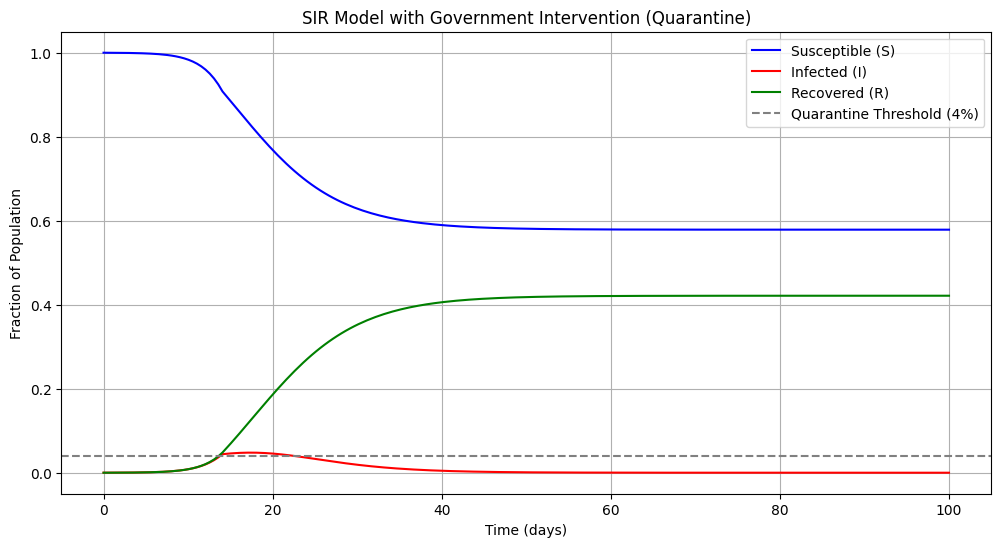


--- Summary ---
Total recovered (i.e., total infected): 42.14% of the population.
Final susceptible fraction: 57.86% (those who never got infected).
Peak infection reached: 4.78% infected at once.


In [73]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
r_initial = 1.0    # Initial infection rate
a = 0.5            # Recovery rate
I0 = 0.0001        # Initial infected fraction
S0 = 1 - I0        # Initial susceptible fraction
R0 = 0.0           # Initial recovered fraction

# Quarantine settings
r_after_quarantine = 0.6  # New r after quarantine
infection_threshold = 0.04  # 4% infected

# Time settings
t_start = 0
t_end = 100
h = 0.5
num_steps = int((t_end - t_start) / h)

# Initialize arrays
t = np.linspace(t_start, t_end, num_steps)
S = np.zeros(num_steps)
I = np.zeros(num_steps)
R = np.zeros(num_steps)
r_values = np.ones(num_steps) * r_initial  # Track r over time

# Set initial conditions
S[0] = S0
I[0] = I0
R[0] = R0

# Simulation
quarantine_applied = False
for n in range(num_steps - 1):
    # Apply stricter quarantine if infection exceeds 4%
    if not quarantine_applied and I[n] >= infection_threshold:
        r_values[n:] = r_after_quarantine
        quarantine_applied = True
        print(f"🔔 Quarantine applied at day {t[n]:.1f} when {I[n]*100:.2f}% infected! r reduced to {r_after_quarantine}.")

    S[n+1] = S[n] + h * (-r_values[n] * S[n] * I[n])
    I[n+1] = I[n] + h * (r_values[n] * S[n] * I[n] - a * I[n])
    R[n+1] = R[n] + h * (a * I[n])

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(t, S, label='Susceptible (S)', color='blue')
plt.plot(t, I, label='Infected (I)', color='red')
plt.plot(t, R, label='Recovered (R)', color='green')
plt.axhline(y=infection_threshold, color='gray', linestyle='--', label='Quarantine Threshold (4%)')
plt.xlabel('Time (days)')
plt.ylabel('Fraction of Population')
plt.title('SIR Model with Government Intervention (Quarantine)')
plt.legend()
plt.grid()
plt.show()

# Summary
total_infected = R[-1]  # Everyone who eventually recovered was once infected
print("\n--- Summary ---")
print(f"Total recovered (i.e., total infected): {total_infected*100:.2f}% of the population.")
print(f"Final susceptible fraction: {S[-1]*100:.2f}% (those who never got infected).")
print(f"Peak infection reached: {np.max(I)*100:.2f}% infected at once.")
